# Import

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Run

In [14]:
result = !python main.py @config/defaults.txt --seed=0

# Parse output

In [15]:
iter_result = result[:-1]
final_result = result[-1]

N = int(final_result.split(',')[17])

iter_result = [[float(x) for x in l.split(',')] for l in iter_result]

fitness = np.array([l[0] for l in iter_result])
temp = np.array([l[1] for l in iter_result])

# Compute probability over time

In [16]:
prob = np.exp(- (1/N) / temp)

# Plot

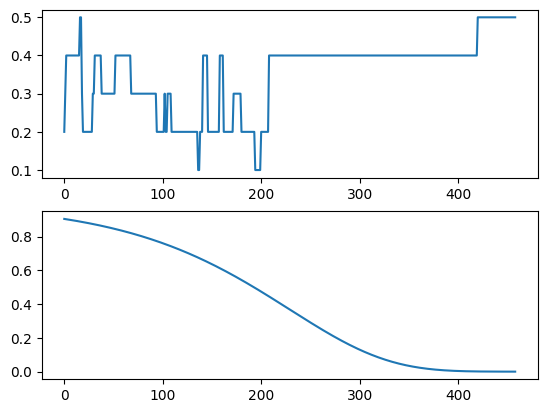

In [17]:
ax1 = plt.subplot(211)
ax1.plot(fitness)

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(prob)